In [43]:
import os
import re
import math
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import networkx as nx

from wordcloud import WordCloud
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [12]:
students = pd.read_csv('students.csv')
professionals = pd.read_csv('professionals.csv')
tags = pd.read_csv('tags.csv')
answer_scores = pd.read_csv('answer_scores.csv')
answers = pd.read_csv('answers.csv')
comments = pd.read_csv('comments.csv')
groups = pd.read_csv('groups.csv')
school_memberships = pd.read_csv('school_memberships.csv')
emails = pd.read_csv('emails.csv')
group_memberships = pd.read_csv('group_memberships.csv')
matches = pd.read_csv('matches.csv')
questions = pd.read_csv('questions.csv')
tag_users = pd.read_csv('tag_users.csv')
tag_questions = pd.read_csv('tag_questions.csv')
question_scores = pd.read_csv('question_scores.csv')

In [4]:
students.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00 UTC+0000
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00 UTC+0000


In [46]:
X = (students[students['students_location'].notnull()].groupby(['students_location']).count().sort_values(['students_id'], ascending = False)[:10]).index
Y = (students[students['students_location'].notnull()].groupby(['students_location']).count().sort_values(['students_id'], ascending = False)[:10])['students_id']

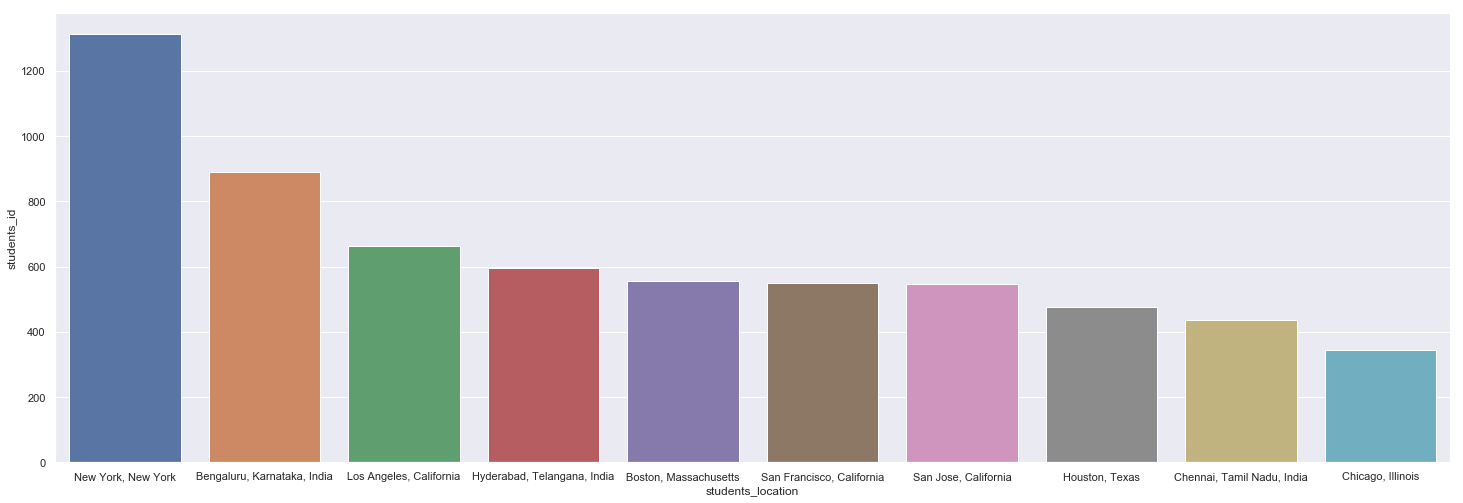

In [54]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.barplot(X, Y)

In [6]:
professionals.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [55]:
X = (professionals[professionals['professionals_location'].notnull()].groupby(['professionals_location']).count().sort_values(['professionals_id'], ascending = False)[:10]).index
Y = (professionals[professionals['professionals_location'].notnull()].groupby(['professionals_location']).count().sort_values(['professionals_id'], ascending = False)[:10])['professionals_id']

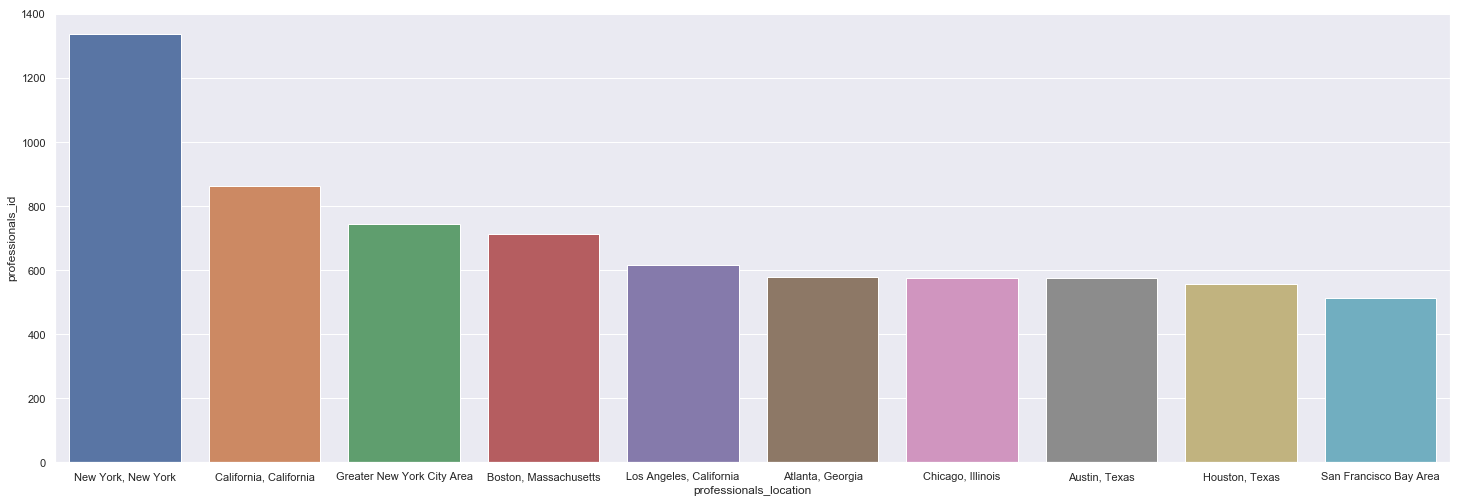

In [56]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.barplot(X, Y)

In [57]:
X = (professionals[professionals['professionals_industry'].notnull()].groupby(['professionals_industry']).count().sort_values(['professionals_id'], ascending = False)[:10]).index
Y = (professionals[professionals['professionals_industry'].notnull()].groupby(['professionals_industry']).count().sort_values(['professionals_id'], ascending = False)[:10])['professionals_id']

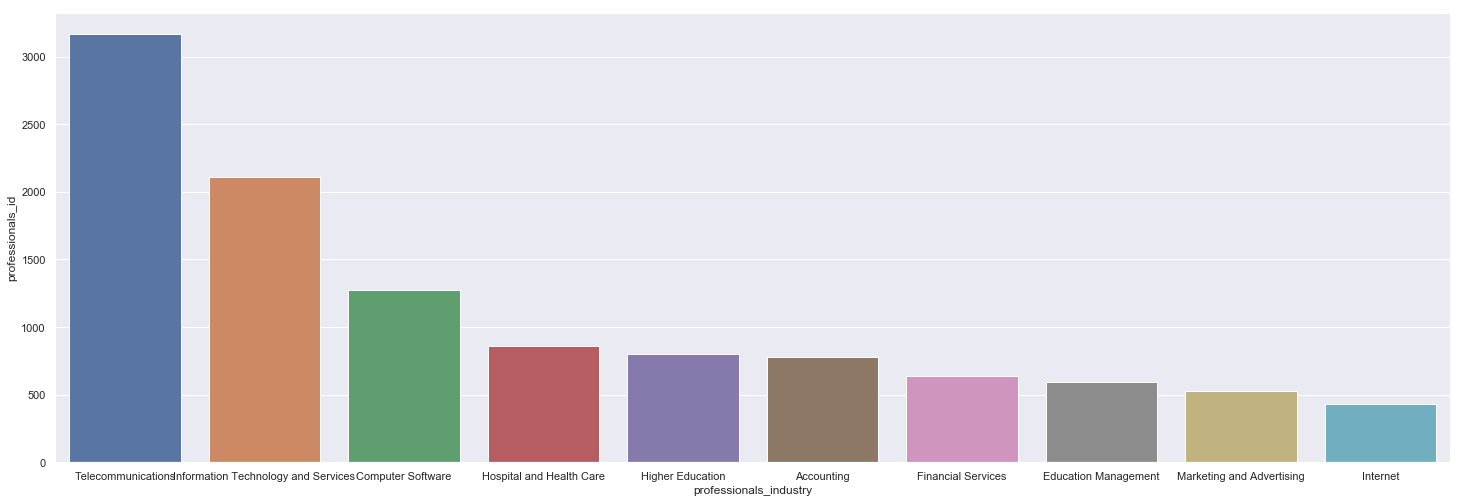

In [58]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.barplot(X, Y)

In [59]:
X = (professionals[professionals['professionals_headline'].notnull()].groupby(['professionals_headline']).count().sort_values(['professionals_id'], ascending = False)[:10]).index
Y = (professionals[professionals['professionals_headline'].notnull()].groupby(['professionals_headline']).count().sort_values(['professionals_id'], ascending = False)[:10])['professionals_id']

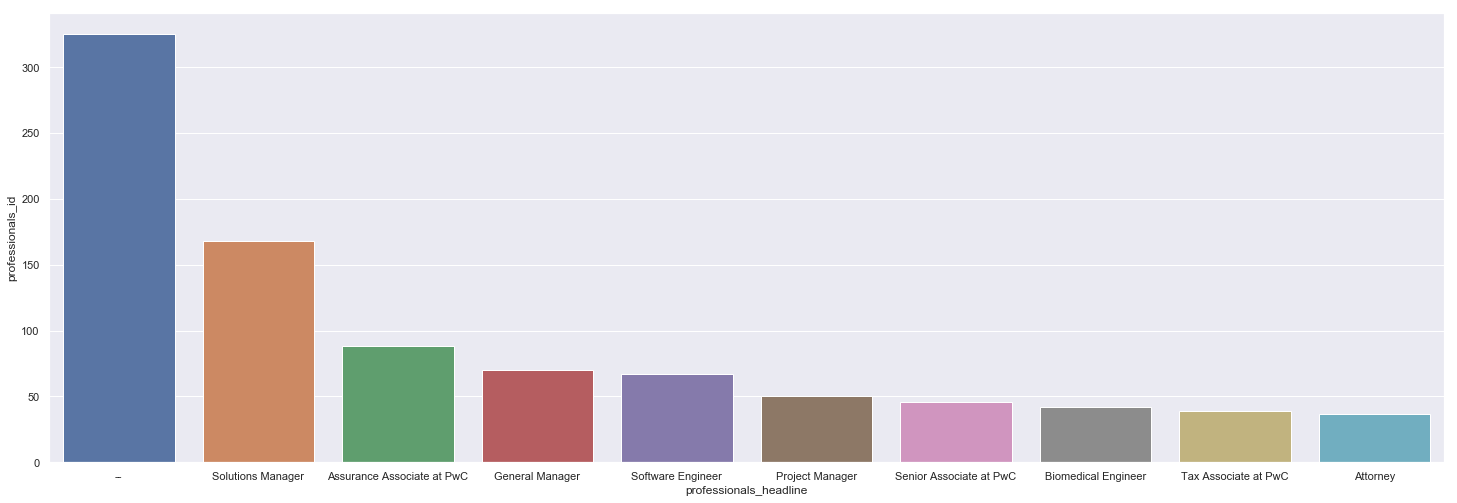

In [60]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.barplot(X, Y)

In [6]:
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [8]:
X = (tags[tags['tags_tag_name'].notnull()].groupby(['tags_tag_name']).count().sort_values(['tags_tag_id'], ascending = False)[:10]).index
Y = (tags[tags['tags_tag_name'].notnull()].groupby(['tags_tag_name']).count().sort_values(['tags_tag_id'], ascending = False)[:10])['tags_tag_id']

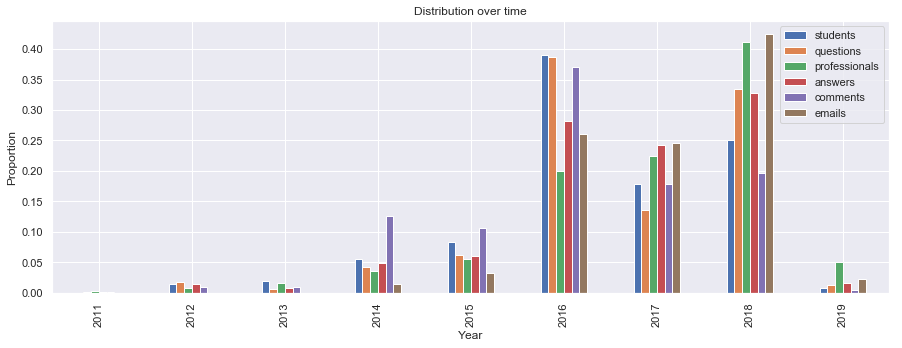

In [40]:
plt_professionals = (professionals.groupby([pd.to_datetime(professionals["professionals_date_joined"]).dt.year]).size()/len(professionals.index))
plt_students = (students.groupby([pd.to_datetime(students["students_date_joined"]).dt.year]).size()/len(students.index))
plt_questions = (questions.groupby([pd.to_datetime(questions['questions_date_added']).dt.year]).size()/len(questions.index))
plt_answers = (answers.groupby([pd.to_datetime(answers['answers_date_added']).dt.year]).size()/len(answers.index))
plt_emails = (emails.groupby([pd.to_datetime(emails['emails_date_sent']).dt.year]).size()/len(emails.index))
plt_comments = (comments.groupby([pd.to_datetime(comments['comments_date_added']).dt.year]).size()/len(comments.index))
plt_data = pd.DataFrame({'students':plt_students,
                         'questions': plt_questions,
                         'professionals':plt_professionals,
                        'answers':plt_answers,
                        'comments':plt_comments,
                        'emails':plt_emails})
plt_data.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Distribution over time')
plt.show()

C:\Users\glin\AppData\Local\Continuum\anaconda3.2\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


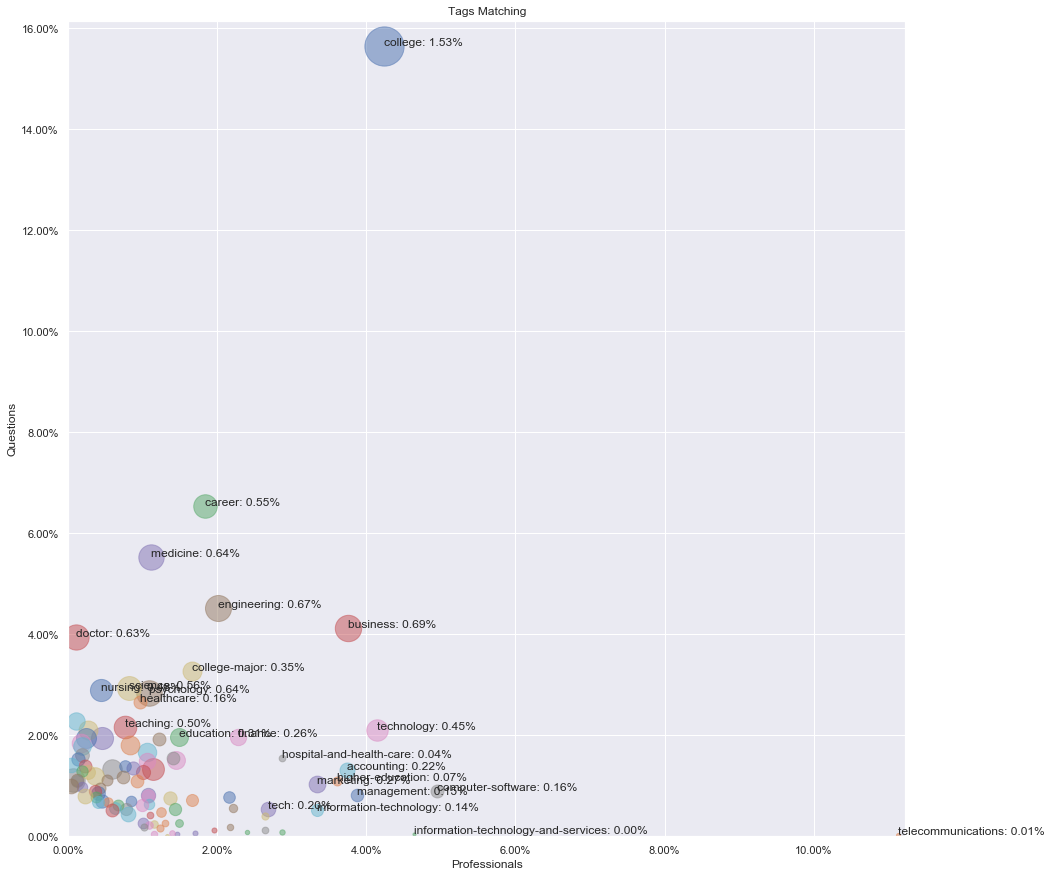

In [41]:
students_tags = tag_users[tag_users['tag_users_user_id'].isin(students['students_id'])]
students_tags = pd.merge(students_tags, tags, left_on='tag_users_tag_id', right_on='tags_tag_id')
students_tags['user_type'] = 'student'

professionals_tags = tag_users[tag_users['tag_users_user_id'].isin(professionals['professionals_id'])]
professionals_tags = pd.merge(professionals_tags, tags, left_on='tag_users_tag_id', right_on='tags_tag_id')
professionals_tags['user_type'] = 'professional'

questions_tags = tag_questions
questions_tags = pd.merge(questions_tags, tags, left_on='tag_questions_tag_id', right_on='tags_tag_id')
questions_tags['user_type'] = 'question'

plt_data = pd.concat([students_tags, professionals_tags, questions_tags])
plt_data = plt_data[['tags_tag_name', 'user_type']].pivot_table(index='tags_tag_name', columns='user_type', aggfunc=len, fill_value=0)
plt_data['professional'] = plt_data['professional'] / professionals.shape[0]
plt_data['student'] = plt_data['student'] / students.shape[0]
plt_data['question'] = plt_data['question'] / questions.shape[0]
plt_data['sum'] = (plt_data['professional'] + plt_data['student'] + plt_data['question'])
plt_data = plt_data.sort_values(by='sum', ascending=False).drop(['sum'], axis=1).head(100)

# Bubble chart
fig, ax = plt.subplots(facecolor='w',figsize=(15, 15))
ax.set_xlabel('Professionals')
ax.set_ylabel('Questions')
ax.set_title('Tags Matching')
ax.set_xlim([0, max(plt_data['professional'])+0.001])
ax.set_ylim([0, max(plt_data['question'])+0.005])
import matplotlib.ticker as mtick
ax.xaxis.set_major_formatter(mtick.FuncFormatter("{:.2%}".format))
ax.yaxis.set_major_formatter(mtick.FuncFormatter("{:.2%}".format))
ax.grid(True)
i = 0
for key, row in plt_data.iterrows():
    ax.scatter(row['professional'], row['question'], s=10+row['student']*10**5, alpha=.5)
    if i < 25:
        ax.annotate('{}: {:.2%}'.format(key, row['student']), xy=(row['professional'], row['question']))
    i += 1
plt.show()

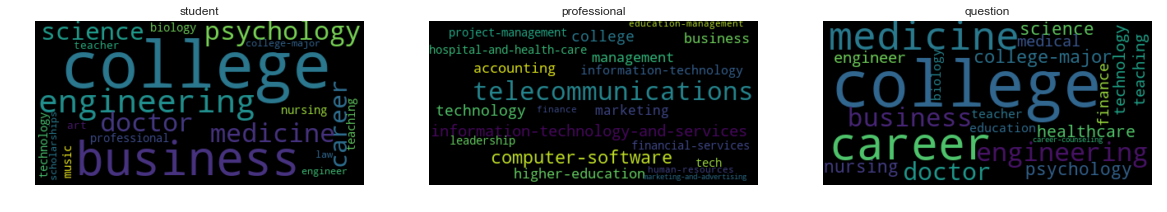

In [48]:
# Wordcloud
plt.figure(figsize=(20, 20))
wordloud_values = ['student', 'professional', 'question']
axisNum = 1
for wordcloud_value in wordloud_values:
    wordcloud = WordCloud(margin=0, max_words=20).generate_from_frequencies(plt_data[wordcloud_value])
    ax = plt.subplot(1, 3, axisNum)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(wordcloud_value)
    plt.axis("off")
    axisNum += 1
plt.show()    